Quando fazemos Análise Exploratória dos Dados, talvez queiramos analisar a distribuição univariada dos atributos presentes em um conjunto de dados.

Podemos utilizar a técnica *small multiplus* para criar pequenos gráficos, uma para cada atributo, para compor a nossa figura. Esse subgráficos são, para o `matplotlib` os *subplots*.

Existem vários meios para construir vários gráficos em uma mesma figura _que a princípio, nem eu mesmo sabia_. Primeiro vamos importar a biblioteca.

In [1]:
from matplotlib import pyplot as plt

## Utilizando a função `plt.subplot`

Sabemos que os diferentes *subplots* que compõe uma figura podiam ser acessados utilizando a sintaxe `.
A função `plt.subplot` aceita que esses valores de linhas, colunas e indexes seja passado de duas formas:

<Axes: >

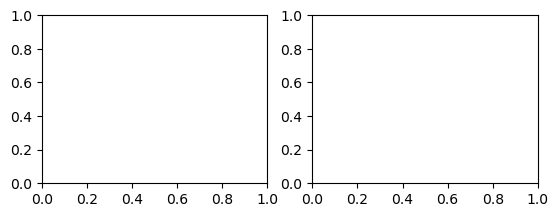

In [2]:
# plt.subplot(rows columns index)
plt.subplot(221) # todo mundo junto

# ... código do gráfico 1 aqui ...

plt.subplot(2, 2, 2) # todo mundo separado

# ... código do gráfico 2 aqui ...

Esse comando significa que estamos criando uma figura com 2 linhas e 2 colunas (2 x 2 = 4 gráficos) e estamos acessando (retornando) o primeiro, o segundo, o terceiro ou o quarto gráfico, isto é, o gráfico correspondente ao valor de `index`.

Esse é o exemplo presente na [documentação](https://matplotlib.org/stable/gallery/pyplots/pyplot_two_subplots.html#sphx-glr-gallery-pyplots-pyplot-two-subplots-py) do `matplotlib`:

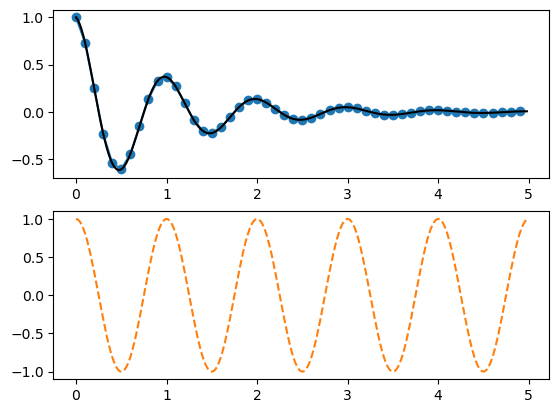

In [3]:
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), color='tab:blue', marker='o')
plt.plot(t2, f(t2), color='black')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')
plt.show()

## Utilizando `plt.subplots`

Sim, `subplots` no plural!

Já a função `plt.subplots` também aceita como parâmetros o número de linhas e o número de colunas da nossa figura, porém ela retorna dois objetos: um objeto do tipo `Figure` e um *array* de `Axes`.

No exemplo a seguir, é criado uma nova figura com dois gráficos, alinhados em uma linha e duas colunas. O *array* de Axes é desempacotado (*unpacked*) já na chamada da função.

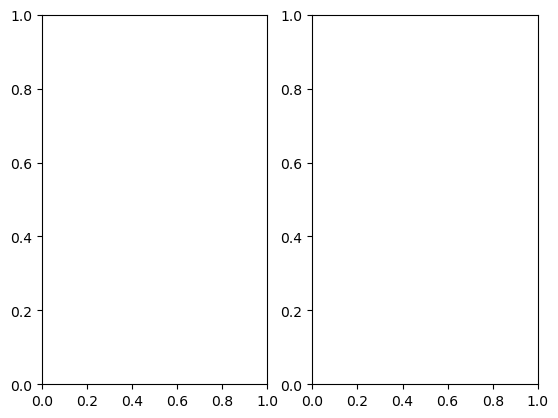

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)

Esse comando cria dois gráficos lado à lado, conforme mostrado na figura.

Nesse outro exemplo, é criado uma figura com quatro gráficos, distribuídos num *grid* de 2x2.

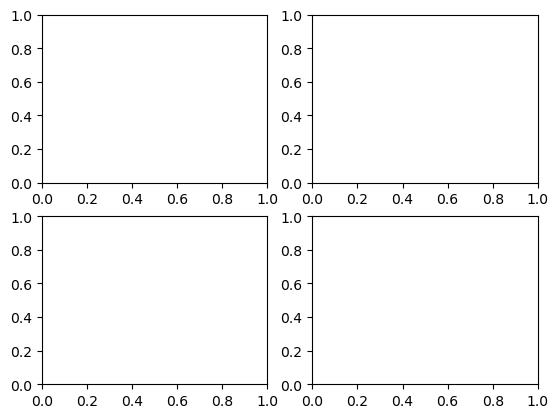

In [5]:
fig, axs = plt.subplots(2, 2)

A variável `axs` retonarda nesse caso, nada mais é que um *array* do `numpy`

In [6]:
print(type(axs), axs.shape)

<class 'numpy.ndarray'> (2, 2)


E é aqui que temos a nossa dica ~~mágica~~.

Como a variável `axs` é um *array* do `numpy`, então nós podemos utilizar o método `flatten` para transformar esse *array* com mais de uma dimensão em um *array* unidimensional.

Imagine, por exemplo, que tenhamos uma dataframe com nove atributos numéricos e nós queremos analisar analisar a distribuição desses atributos separadamente.

Podemos então utilizar um padrão de código como o do exemplo a seguir:

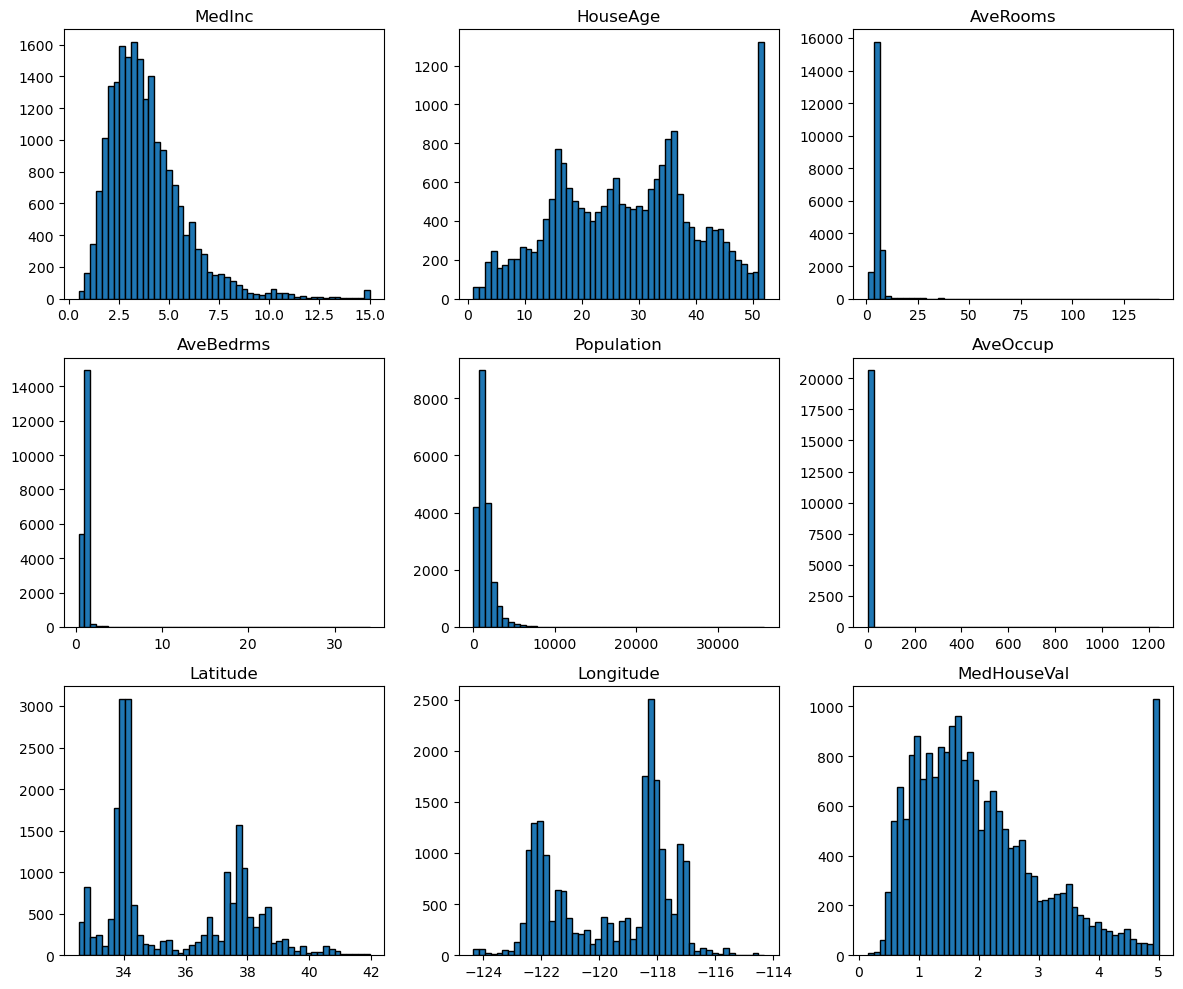

In [7]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))
axs = axs.flatten()

for col, ax in zip(df.columns, axs):
    ax.hist(df[col], bins=50, edgecolor="black")
    ax.set_title(col)

plt.tight_layout()

Eu vi esse padrão de código [nesse notebook](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) do kaggle, que é parecido com [esse outro aqui](https://www.kaggle.com/code/agnihotri/linear-regression-and-pca-boston-housing)!

E a minha "contribuição" foi usar o `enumerate` ali... rsrs

Maravilha, né?

## Referências

Documentação ofical do `Matplotlib`. **matplotlib.pyplot.subplot**. Disponível em <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html> Acessado em 24 de fev. de 2023.

Documentação ofical do `Matplotlib`. **matplotlib.pyplot.subplots**. Disponível em <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html> Acessado em 24 de fev. de 2023.

Documentação oficial do `NumPy`. **numpy.ndarray.flatten**. Disponível em <https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html> Acessado em 24 de fev. de 2023.